In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_roc_curve, classification_report
import matplotlib.pyplot as plt

In [5]:
atp_df = pd.read_pickle('atp_cleaned_data.pkl')

In [6]:
atp_df.isna().sum()

draw_size        0
match_num        0
player_id        0
player_seed      0
player_height    0
                ..
round_r16        0
round_r32        0
round_r64        0
round_rr         0
round_sf         0
Length: 1709, dtype: int64

In [9]:
list(atp_df.columns)

['draw_size',
 'match_num',
 'player_id',
 'player_seed',
 'player_height',
 'player_age',
 'best_of',
 'minutes',
 'ace',
 'double_fault',
 'service_points_won',
 'first_serve_made',
 'first_serve_won',
 'second_serve_won',
 'serve_game',
 'break_point_saved',
 'break_point_faced',
 'player_rank',
 'player_rank_points',
 'target',
 'year',
 'month',
 'day',
 'tourney_name_atp_next_gen_finals',
 'tourney_name_acapulco',
 'tourney_name_adelaide',
 'tourney_name_amersfoort',
 'tourney_name_amsterdam',
 'tourney_name_antalya',
 'tourney_name_antwerp',
 'tourney_name_athens_olympics',
 'tourney_name_atlanta',
 'tourney_name_atp_cup',
 'tourney_name_auckland',
 'tourney_name_australian_open',
 'tourney_name_bangkok',
 'tourney_name_barcelona',
 'tourney_name_basel',
 'tourney_name_bastad',
 'tourney_name_beijing',
 'tourney_name_beijing_olympics',
 'tourney_name_belgrade',
 'tourney_name_bogota',
 'tourney_name_brighton',
 'tourney_name_brisbane',
 'tourney_name_bucharest',
 'tourney_name_b

In [12]:
y = atp_df["target"]
X = atp_df.drop(["target"], axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
rf = RandomForestClassifier()

In [15]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
names = X.columns

In [18]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

Features sorted by their score:
[(0.1171, 'break_point_faced'), (0.0613, 'first_serve_won'), (0.0539, 'player_rank_points'), (0.0501, 'player_rank'), (0.0431, 'second_serve_won'), (0.0429, 'service_points_won'), (0.0423, 'player_age'), (0.0408, 'break_point_saved'), (0.0405, 'player_id'), (0.0397, 'match_num'), (0.0384, 'first_serve_made'), (0.0375, 'ace'), (0.0363, 'minutes'), (0.0306, 'day'), (0.0302, 'double_fault'), (0.03, 'year'), (0.0292, 'player_height'), (0.0282, 'serve_game'), (0.0252, 'player_seed'), (0.0166, 'month'), (0.011, 'draw_size'), (0.0059, 'round_r32'), (0.0051, 'round_r16'), (0.0047, 'surface_hard'), (0.0046, 'surface_clay'), (0.0041, 'round_r64'), (0.0039, 'player_hand_r'), (0.0038, 'round_qf'), (0.0035, 'player_hand_l'), (0.0031, 'best_of'), (0.0028, 'tourney_level_a'), (0.0026, 'surface_grass'), (0.0026, 'round_sf'), (0.0025, 'tourney_level_m'), (0.0024, 'round_r128'), (0.0017, 'tourney_level_g'), (0.0017, 'round_f'), (0.0016, 'surface_carpet'), (0.0011, 'tourne

In [20]:
accuracy_score(y_test, rf.predict(X_test))

0.7387626558392546

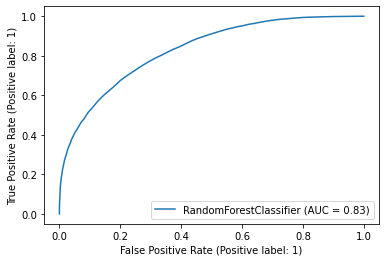

In [26]:
plot_roc_curve(rf, X_test, y_test)
plt.show()  

In [29]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74     19115
           1       0.75      0.72      0.74     19306

    accuracy                           0.74     38421
   macro avg       0.74      0.74      0.74     38421
weighted avg       0.74      0.74      0.74     38421

